# EDA of titanic dataset

In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [3]:
titanic = pd.read_csv('titanic_train.csv');

#removing irrelavent features:
del titanic['Name']
del titanic['Fare']
del titanic['Ticket']
del titanic['Embarked']
del titanic['PassengerId']
del titanic['SibSp']
del titanic['Parch']

#removing non numeric values
del titanic['Cabin']


#replacing Sex value with numeric values
titanic['Sex'] = titanic['Sex'].replace(['male', 'female'],[1, 0])

#replacing NaN value in Age with mean value of Age 
titanic['Age'].fillna(np.mean(titanic['Age']), inplace=True)
titanic.head(10)

,Survived,Pclass,Sex,Age
0,0,3,1,22.000000
1,1,1,0,38.000000
2,1,3,0,26.000000
3,1,1,0,35.000000
4,0,3,1,35.000000
5,0,3,1,29.699118
6,0,1,1,54.000000
7,0,3,1,2.000000
8,1,3,0,27.000000
9,1,2,0,14.000000


# Description of dataset
* Survived: survive status of each passenger( 1 = survived, 0 = not survived)
* Pclass: class of ticket.
* Sex: 1-Male, 0-Female
* Age: Age of each passenger


# Performing Univariate analysis

In [4]:
titanic['Survived'].value_counts()

#There are 549 survived people and 342 not survived people in this dataset.

0    549
1    342
Name: Survived, dtype: int64

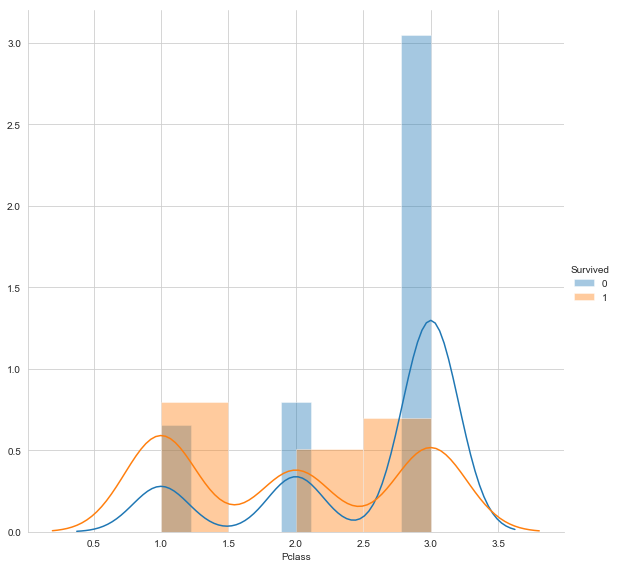

In [6]:
#plotting density plot for each feature
titanic_survived = titanic.loc[titanic['Survived']==1]
titanic_nots = titanic.loc[titanic['Survived']==0]

sns.set_style('whitegrid');

#plotting density plot for Pclass
sns.FacetGrid(titanic, hue='Survived', height=8)\
    .map(sns.distplot, 'Pclass')\
    .add_legend();

## Observation
* The Passengers belongin to class 3 has the lowest survival rate, or large no. of passenger died from class 3 as compare to 1 and 2.
* In class 1, more people were able to survive compare to non-survived.
* In class 2, less people were able to survive compare to non-survived.


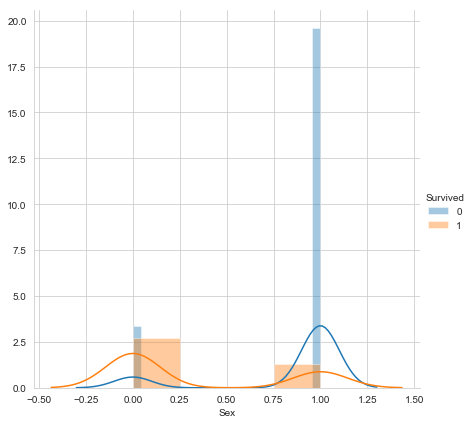

In [7]:
#plotting density plot for Sex
sns.FacetGrid(titanic, hue='Survived', size=6)\
    .map(sns.distplot, 'Sex')\
    .add_legend();

## Observation
* Very Large no of male were died as compare to survived male.
* Not survived or number of female is slightly higher than survived one, but not that much in case of male.

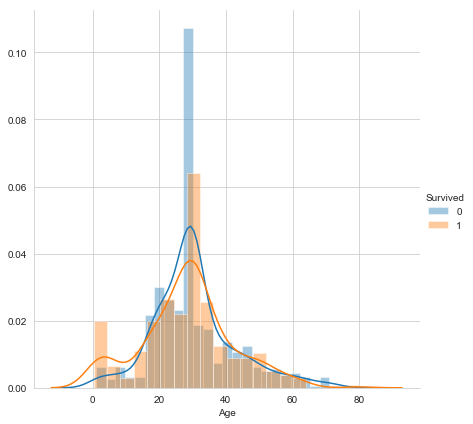

In [8]:
#plotting density plot for age

sns.FacetGrid(titanic, hue='Survived', size=6)\
    .map(sns.distplot,'Age')\
    .add_legend();

## Observations:
* There are large no of people died at age between 26-32 as compare to people survived in that age group.
* For others age range the plot is too overlapping for classifying them.
* Number of survived people between age 1-4 is larger than not survived in this range.

[0.39766082 0.25438596 0.34795322] [0.39766082 0.65204678 1.        ]


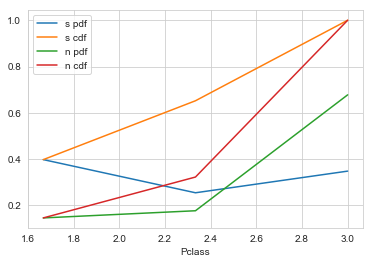

In [9]:
#Plotting pdf and cdf for each feature

#plotting pdf for Pclass

counts, bin_edges = np.histogram(titanic_survived['Pclass'], bins=3, density=True);
pdf = counts/sum(counts);
cdf = np.cumsum(pdf);
print(pdf, cdf)

plt.plot(bin_edges[1:], pdf, label='s pdf');
plt.plot(bin_edges[1:], cdf, label='s cdf');
plt.xlabel('Pclass');

counts, bin_edges = np.histogram(titanic_nots['Pclass'], bins=3, density=True)
pdf = counts/sum(counts);
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:], pdf, label= 'n pdf');
plt.plot(bin_edges[1:], cdf, label= 'n cdf');
plt.legend();


## Observation
* There is too much overlapping and hence can't classify them.

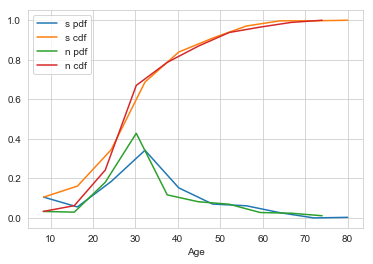

In [96]:
#plotting pdf and cdf for Age.

counts, bin_edges = np.histogram(titanic_survived['Age'], bins=10, density=True);
pdf = counts/sum(counts);
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:], pdf, label='s pdf');
plt.plot(bin_edges[1:], cdf, label='s cdf');
plt.xlabel('Age');

counts, bin_edges = np.histogram(titanic_nots['Age'], bins=10, density=True);
pdf = counts/sum(counts);
cdf = np.cumsum(pdf);
plt.plot(bin_edges[1:], pdf, label='n pdf');
plt.plot(bin_edges[1:], cdf, label='n cdf');
plt.xlabel('Age');

plt.legend();

## observation
* There is too much overlapping and hence can't classify on basis of this

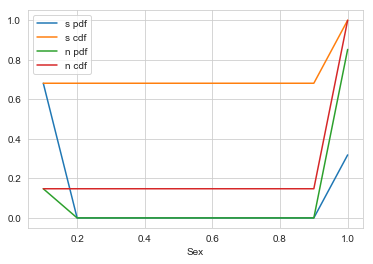

In [10]:
#plotting pfd and cdf for Sex

counts, bins = np.histogram(titanic_survived['Sex'], bins=10, density=True);
pdf = counts/sum(counts);
cdf = np.cumsum(pdf);
plt.plot(bins[1:], pdf, label='s pdf');
plt.plot(bins[1:], cdf, label='s cdf');
plt.xlabel('Sex');

counts, bins = np.histogram(titanic_nots['Sex'], bins=10, density=True);
pdf = counts/sum(counts);
cdf = np.cumsum(pdf);
plt.plot(bins[1:], pdf, label='n pdf');
plt.plot(bins[1:], cdf, label='n cdf');
plt.legend();

## Observation
* Very less no. of female were died as compare to male.

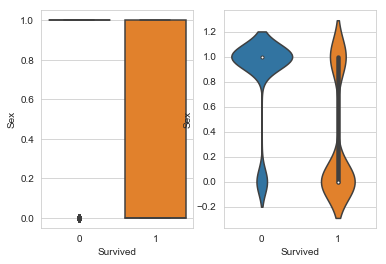

In [19]:
#plotting box plot & violin plot for Sex
plt.figure(1);

ax = plt.subplot(121);
sns.boxplot(x='Survived', y='Sex', data=titanic, ax=ax);

ax=plt.subplot(122);
sns.violinplot(x='Survived', y='Sex', data=titanic, ax=ax)


# Perfoming Bivariate analysis

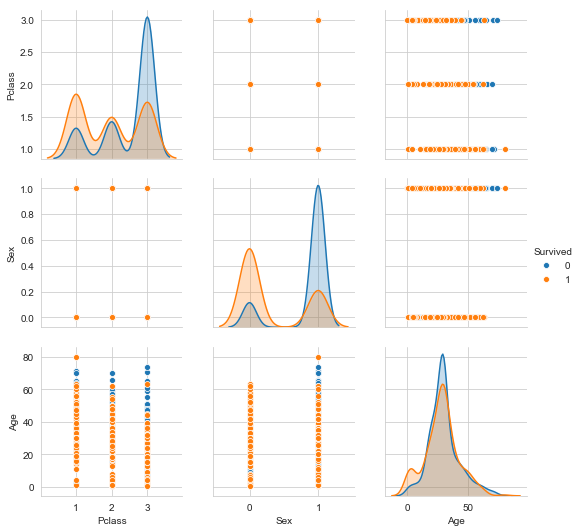

In [14]:
#plotting pair plot
plt.close()
sns.pairplot(data=titanic, hue='Survived', vars=['Pclass', 'Sex', 'Age']);

## Observation
* there is too much overlapping in each case hence can't classify on this basis too.